# Matplotlib

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_frame = pd.read_csv("house.csv")

## My first graph. Line Chart

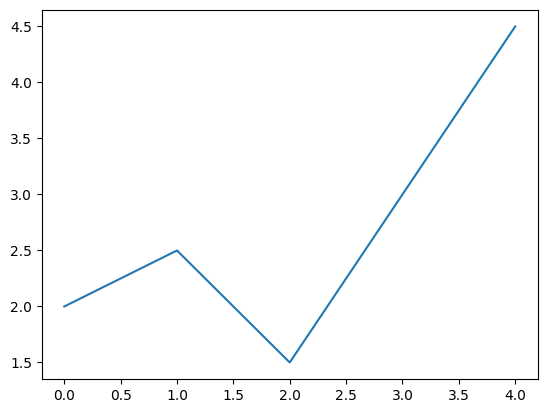

In [45]:
x = np.arange(5)
y = np.array([2.0, 2.5, 1.5, 3.0, 4.5])

plt.plot(x, y) 
plt.show()

### Dot Chart

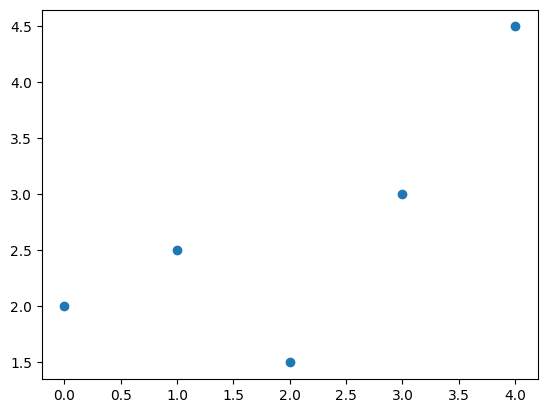

In [46]:
plt.plot(x, y, 'o') 
plt.show()

### X Chart

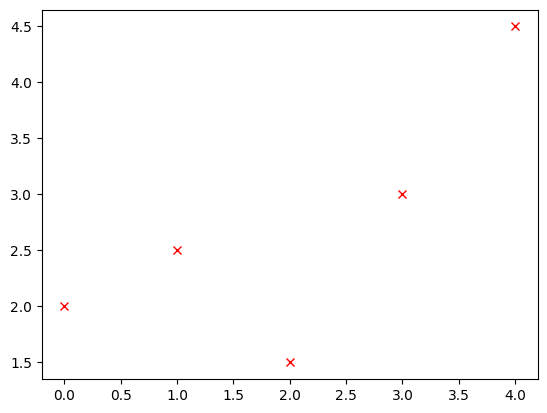

In [47]:
plt.plot(x, y, 'xr') 
plt.show()

Now that we've seen several types of simple charts, let's see how we can paint several charts on the same plot

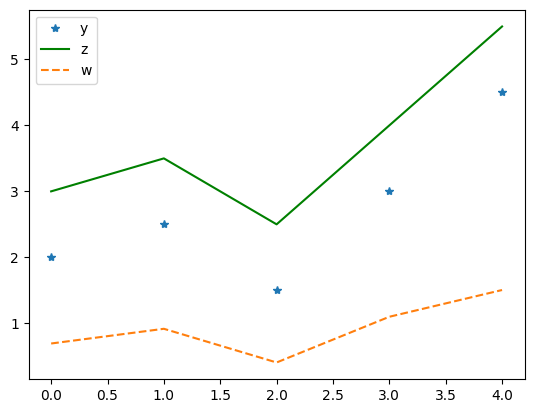

In [48]:
z = y + 1
w = np.log(y)

plt.plot(x, y, '*', label = 'y')
plt.plot(x, z, 'g-', label = 'z')
plt.plot(x, w, '--', label = 'w')
plt.legend() # To showt the legends
plt.show()

### Chart styles

In [49]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Line chart
`plt.plot()`

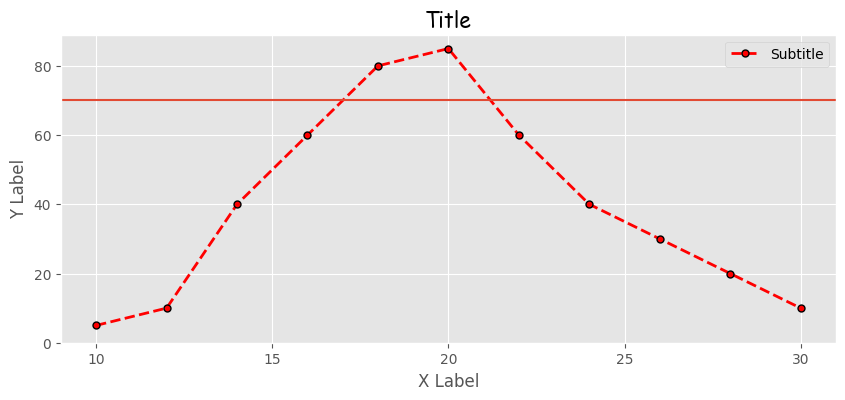

In [50]:
import matplotlib.style as mplstyle

x = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30] 
x2 = np.arange(1, 10, 2)
y = [5, 10, 40, 60, 80, 85, 60, 40, 30, 20, 10]

# styles
mplstyle.use('ggplot') # dark_background, fast

# Risize graph
plt.figure(figsize=(10, 4), dpi=100) # figsize=(x, y)

plt.plot(x, y, label="Subtitle", color="#FF0000", linewidth=2, marker=".", markersize=10, markeredgecolor="#000", linestyle="--")

# plt.plot(x2, x2 ** 2) # Could be more than one lines

# Titles
plt.title("Title", fontdict={"fontname": "Comic Sans MS", "fontsize": "15"}) # Top title
plt.xlabel("X Label") # X label
plt.ylabel("Y Label") # Y label
plt.axhline(70) # line
plt.legend() # Shows it!

# ticks
plt.xticks(np.arange(10, 31, 5)) # np.arange(start, end, step)
plt.yticks(np.arange(0, 81, 20))

# file name
plt.savefig("plot_graph.png", dpi=200)

plt.show()

## Bar Chart
`plt.bar()`

In [51]:
num_bedrooms = data_frame["bedrooms"].value_counts()
num_bedrooms

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

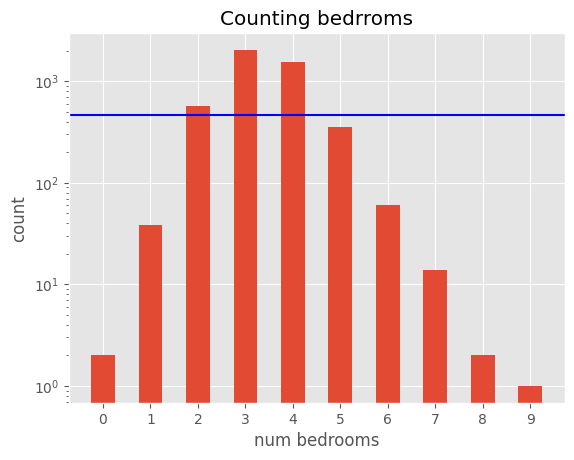

In [52]:
labels = num_bedrooms.index.values
values = num_bedrooms

plt.bar(labels, values, width = 0.5, align='center') # plt.bar(x, y)
plt.axhline(values.mean(), color = "blue") # line

plt.title("Counting bedrroms") # Top title
plt.xlabel("num bedrooms") # X label
plt.ylabel("count") # Y label
plt.yscale("log")

# ticks
plt.xticks(labels)

plt.show()

### Style bars

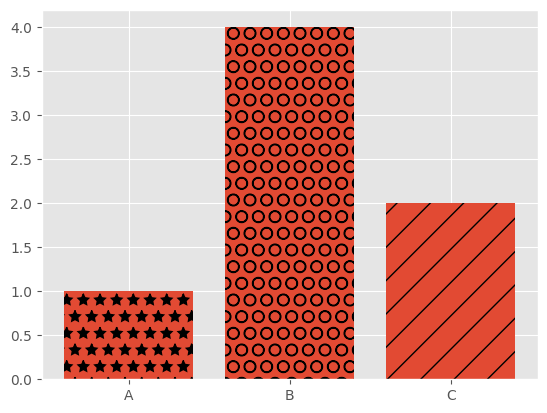

In [53]:
labels = ["A", "B", "C" ]
values = [1, 4, 2]
patterns = ["/", "O", "*"]

bars = plt.bar(labels, values) 

for bar in bars:
  bar.set_hatch(patterns.pop())

plt.show()

## Histogram
`plt.hist()`

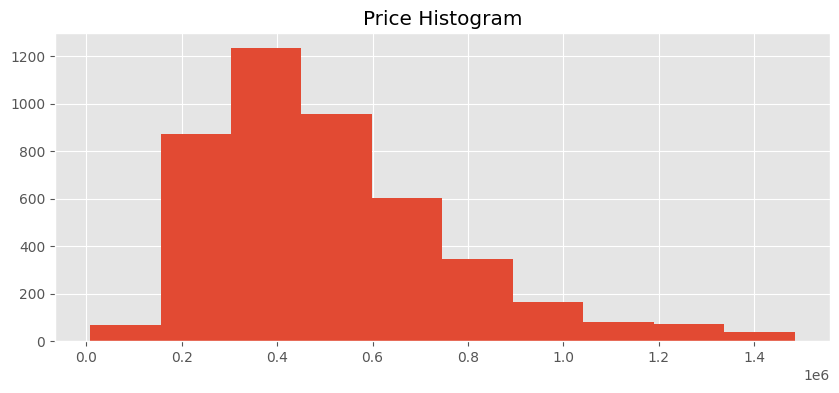

In [54]:
prices = data_frame.query('price > 0 and price < 1_500_000')["price"].round(2)

plt.figure(figsize=(10, 4), dpi=100)

plt.hist(prices, bins = 10)
# plt.hist(prices, bins = 2) See the diference in bins number

plt.title(label = "Price Histogram")

plt.show()

## Dot chart
`plt.scatter()`

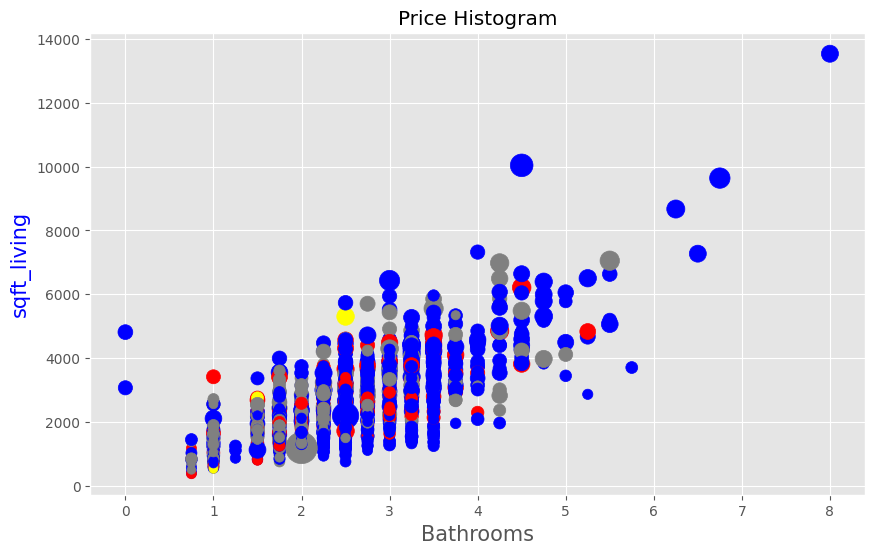

In [55]:
plt.figure(figsize=(10, 6), dpi=100)

x = data_frame['bathrooms']
y = data_frame['sqft_living']
vol = np.sqrt(data_frame["price"]) / 10
colors = ["", "green", "yellow", "blue", "gray", "red"]

# s = vol. Make bigger the dots depending of the price
# c (color) = data_frame['condition'].apply(lambda x: colors[x]. Depending of two arrays with the same lenght
plt.scatter(x, y, s = vol, c = data_frame['condition'].apply(lambda x: colors[x])) # plt.scatter(x, y) 

plt.title(label = "Price Histogram")
plt.xlabel('Bathrooms', fontsize = 15)
plt.ylabel('sqft_living', c = 'blue', fontsize = 15)

plt.show()

## Bar chart
`plt.pie()`

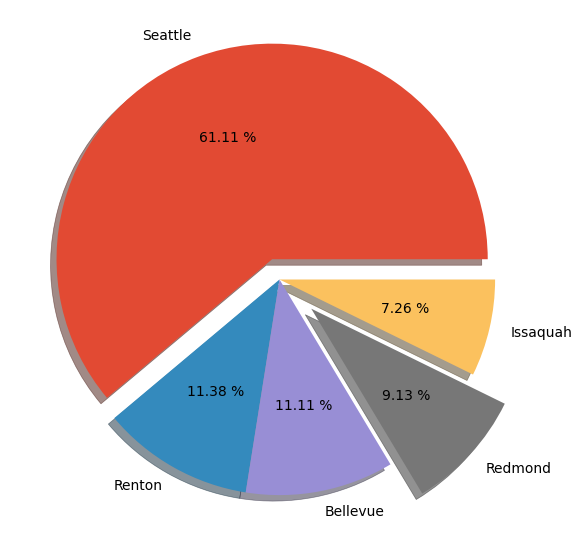

In [56]:
cities = data_frame.query('city in ("Seattle", "Renton", "Bellevue", "Redmond", "Issaquah")')
cities_porcentage = cities['city'].value_counts(normalize = True)
explode = [0.1, 0, 0, 0.2, 0]

plt.figure(figsize = (15, 7))

# autopct="%.2f %%" Porcentages
# pctdistance=0.8 Porcentages radius distance
# explode By defualt 0
# shadow = True. Show only with explode set
# startangle = 0. Turn to the left or right the chart
plt.pie(cities_porcentage, labels = cities_porcentage.index, autopct="%.2f %%", shadow = True, explode = explode, startangle = 0)

plt.show()

## Table Chart
`ptl.table()`

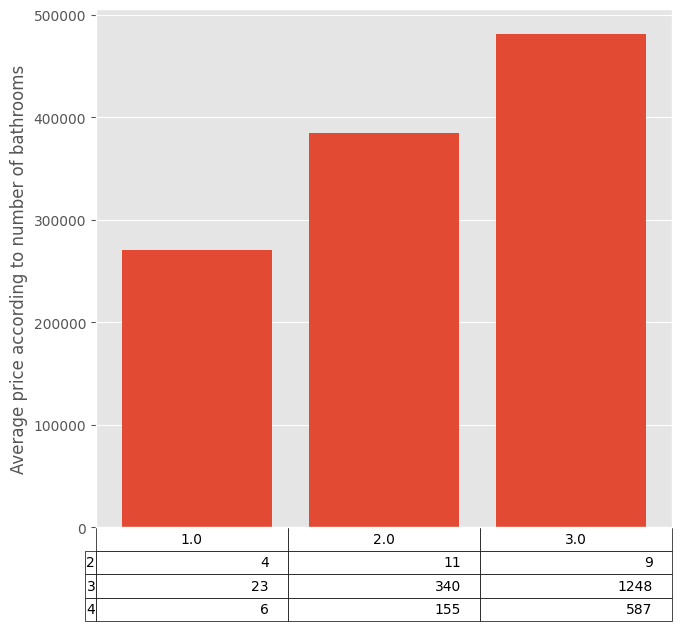

In [57]:
df = data_frame.query('condition in (2, 3, 4) and bedrooms in (1, 2, 3)')
price_mean = df.groupby('bedrooms')['price'].mean()
bedrooms_condition = df.pivot_table(index = 'condition', columns = 'bedrooms', values = 'price', aggfunc=np.count_nonzero)

plt.bar(price_mean.index, height = price_mean.values)
plt.table(bedrooms_condition.values, loc = 'bottom', rowLabels = bedrooms_condition.index.values, colLabels = bedrooms_condition.columns.values)

plt.subplots_adjust(left = 0, bottom = -0.2) # move the table to the botoom

plt.ylabel("Average price according to number of bathrooms")
plt.xticks([]) # No ticks

plt.show()

## Heat map
`plt.pcolormesh()`

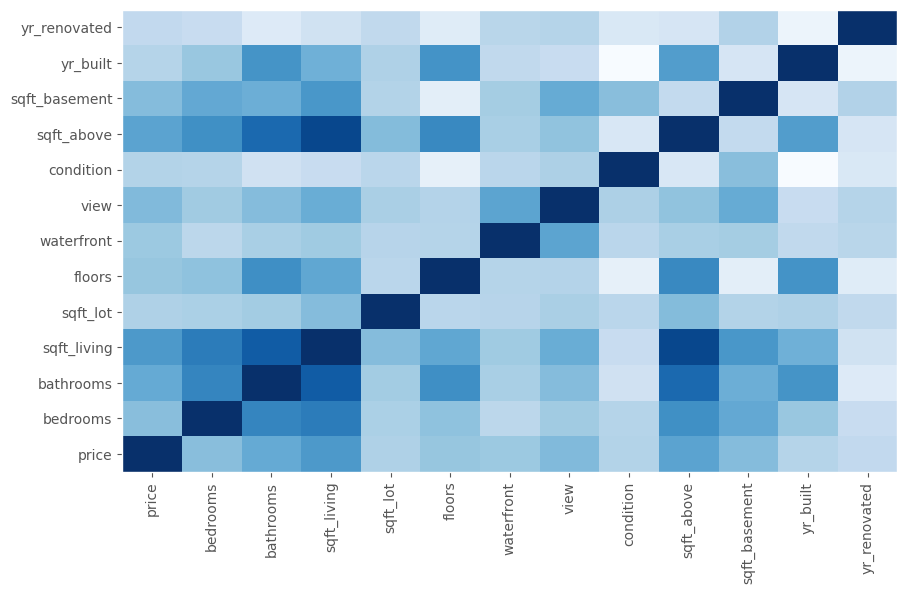

In [58]:
data_corr = data_frame[["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"]]
columns = data_corr.columns.values
steps = np.arange(columns.size)

plt.figure(figsize = (10, 6))
plt.pcolormesh(steps, steps, data_corr.corr().values, cmap = "Blues") # pcolormesh(x, y, values)

# ticks(number_var, values)
plt.xticks(steps, data_corr.columns, rotation = 'vertical') 
plt.yticks(steps, data_corr.columns, rotation = 'horizontal')

plt.show()


## Subplots and legends
What happens if the magnitudes are different? It is difficult to interpret the blue line, since the red line has much greater dominance of the variable. To do this, we can create an axis on the right side.

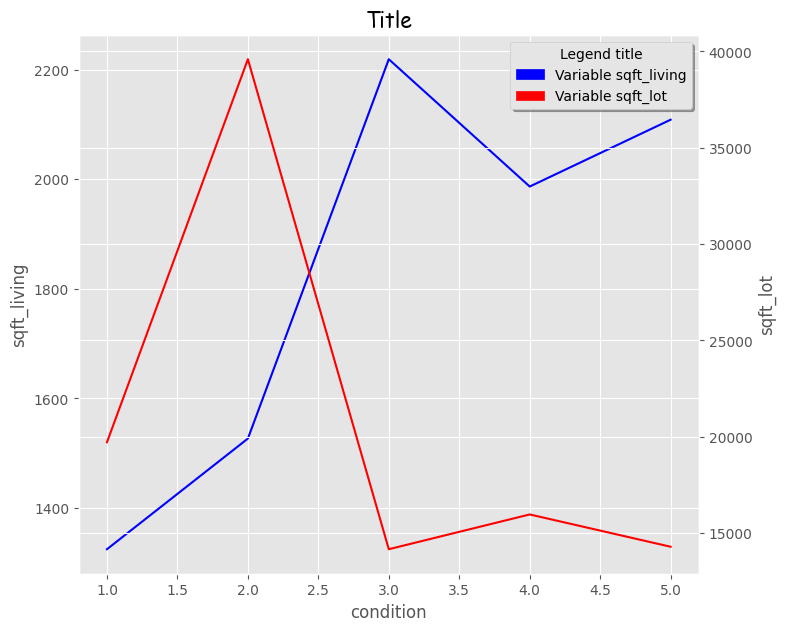

In [59]:
import matplotlib.patches as mpatches

group_by = data_frame.groupby('condition').agg({
    'sqft_living' : 'mean',
    'sqft_lot' : 'mean'
})

fig, ax = plt.subplots(figsize = (8,7))

# First line
ax.plot(group_by['sqft_living'], label = 'sqft_living', color = 'blue')
ax.set_xlabel("condition")
ax.set_ylabel("sqft_living")

# Second line
ax1 = ax.twinx()
ax1.plot(group_by['sqft_lot'], label = 'sqft_lot', color = "red")

sqft_living = mpatches.Patch(color = 'blue', label = 'Variable sqft_living')
sqft_lot = mpatches.Patch(color = 'red', label = 'Variable sqft_lot')
plt.ylabel("sqft_lot") # Y label

plt.title("Title", fontdict={"fontname": "Comic Sans MS", "fontsize": "15"}) # Top title
plt.legend(handles=[sqft_living, sqft_lot], title = 'Legend title', shadow = True)

plt.show()


## Create several charts

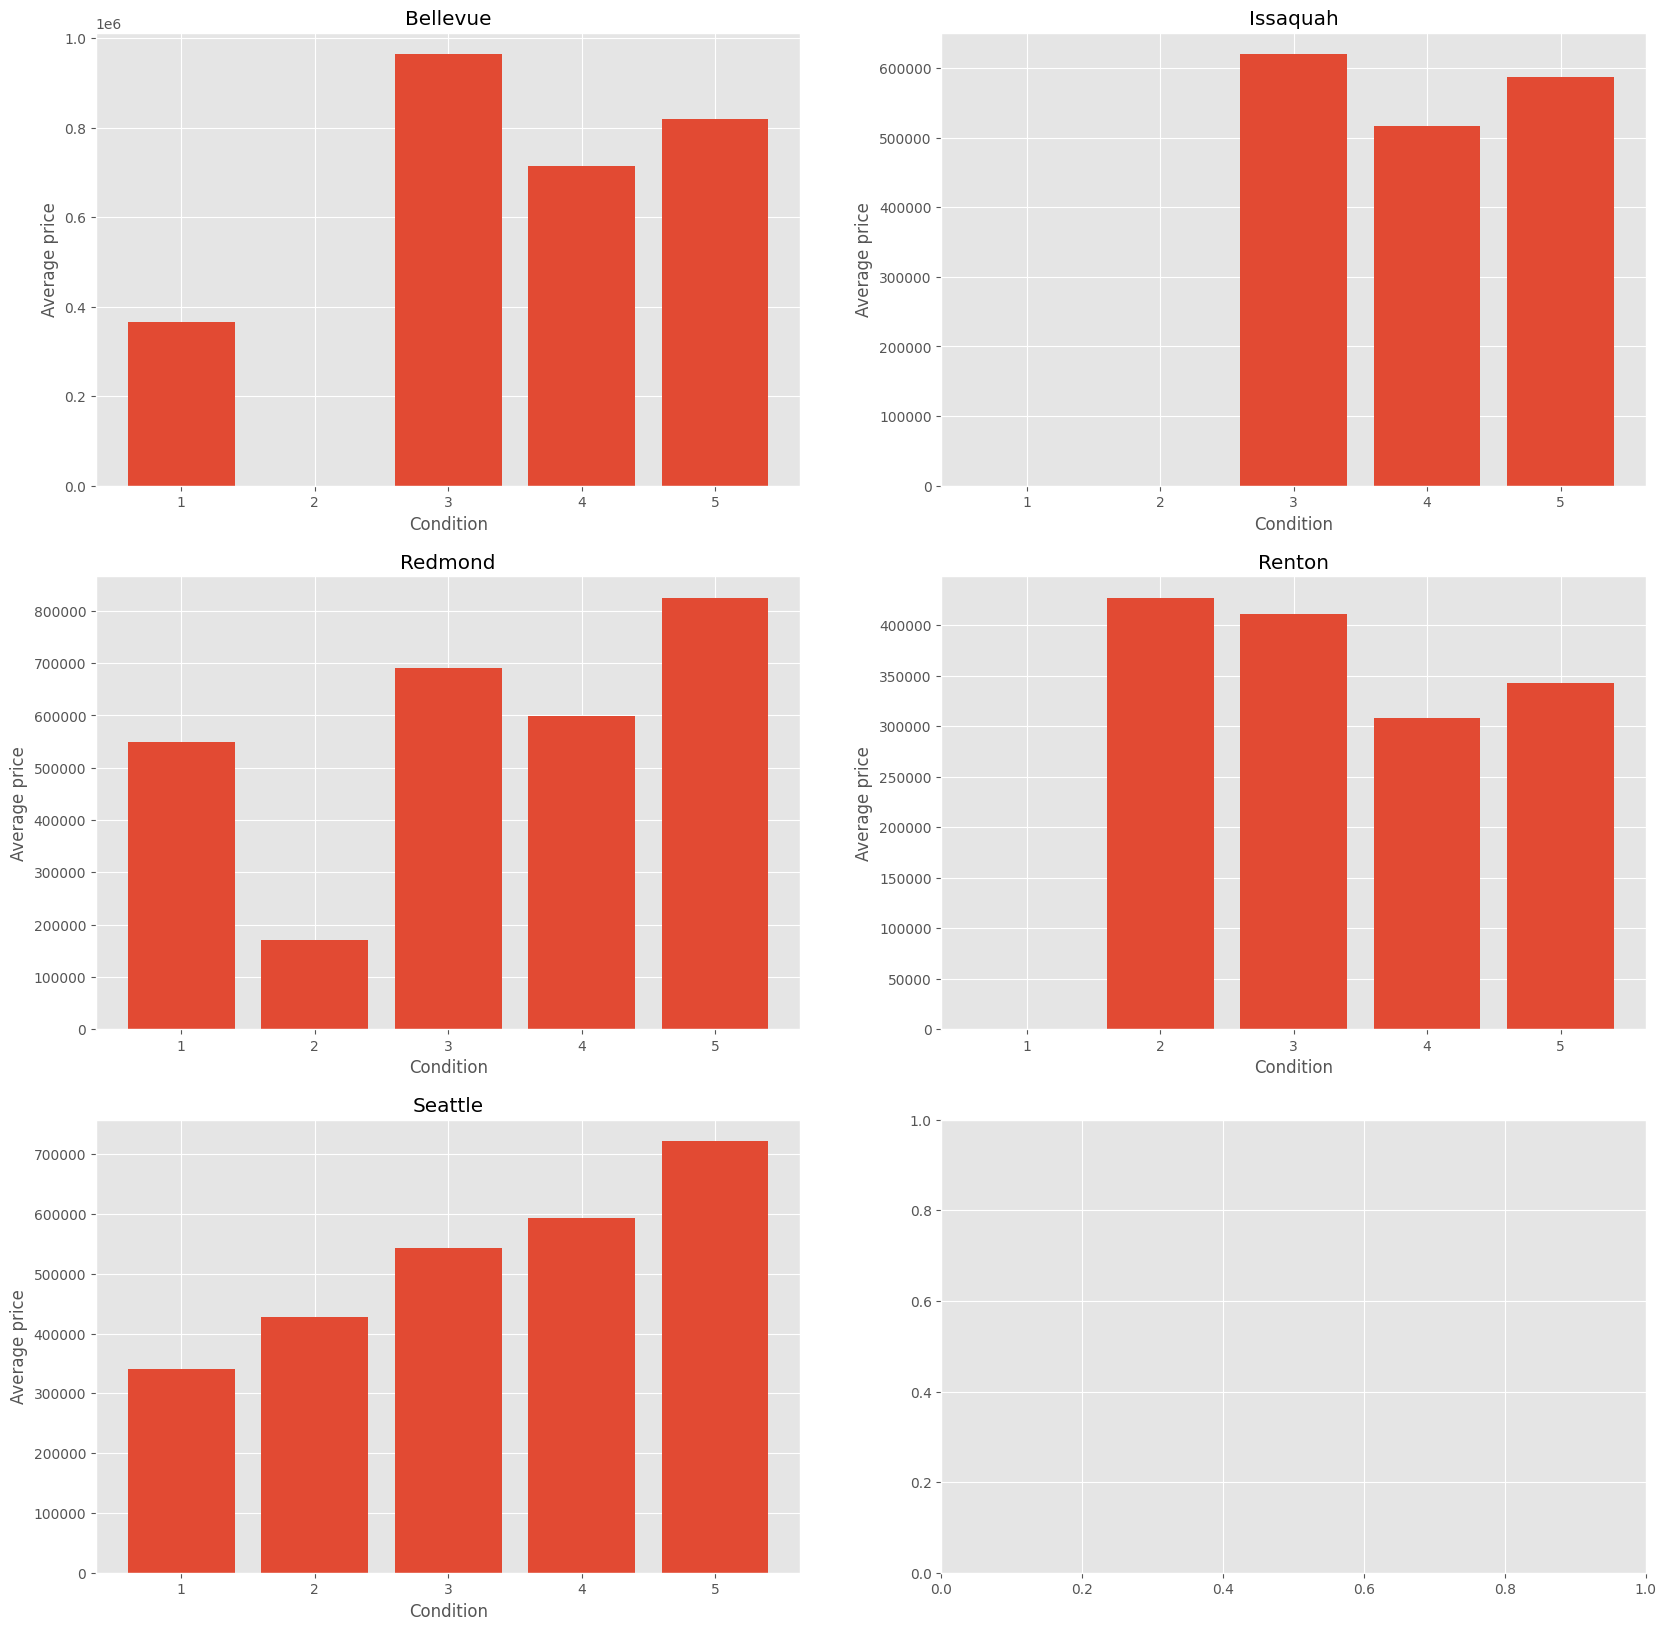

In [60]:
cities = data_frame.query('city in ("Seattle", "Renton", "Bellevue", "Redmond", "Issaquah")')

agr = cities.groupby(['city', 'condition'])['price'].mean().unstack().T
agr.fillna(0, inplace = True)

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

i, j = 0, 0

for city in agr.columns.values:
    ax[i, j].bar(x = agr.index, height = agr[city].values)
    ax[i, j].set_title(city)
    ax[i, j].set_xlabel('Condition')
    ax[i, j].set_ylabel('Average price')
    j+=1
    if j == 2:
        i+=1
        j=0

## Exercises

### Gas prices

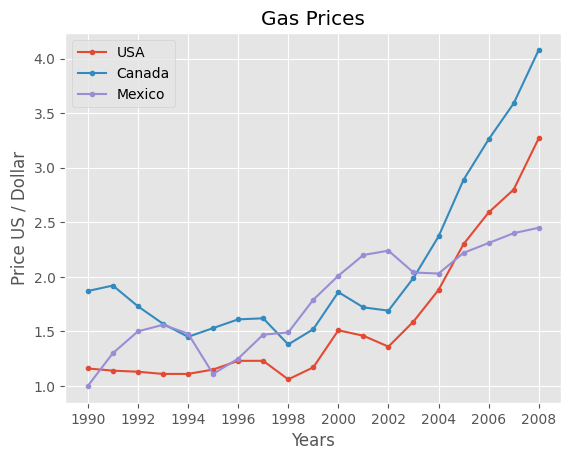

In [61]:
gas = pd.read_csv("gas_prices.csv")

plt.plot(gas["Year"], gas["USA"], label="USA", marker=".")
plt.plot(gas["Year"], gas["Canada"], label="Canada", marker=".")
plt.plot(gas["Year"], gas["Mexico"], label="Mexico", marker=".")

# Show all countries
# for country in gas:
#   if (country != "Year"):
#     plt.plot(gas["Year"], gas[country], label=country, marker=".")

# Another way to plot many values!
# countries_to_look_at = ["USA", "Canada", "Mexico", "Australia"]
# for country in gas:
#   if (country in countries_to_look_at):
#     plt.plot(gas["Year"], gas[country], marker=".")

# Titles
plt.title("Gas Prices") 
plt.xlabel("Years") 
plt.ylabel("Price US / Dollar") 
plt.legend() # Show legends

# ticks
plt.xticks(np.arange(gas["Year"].min(), gas["Year"].max()+ 1, 2))

plt.show()

### Fifa
#### Fifa Histogram

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


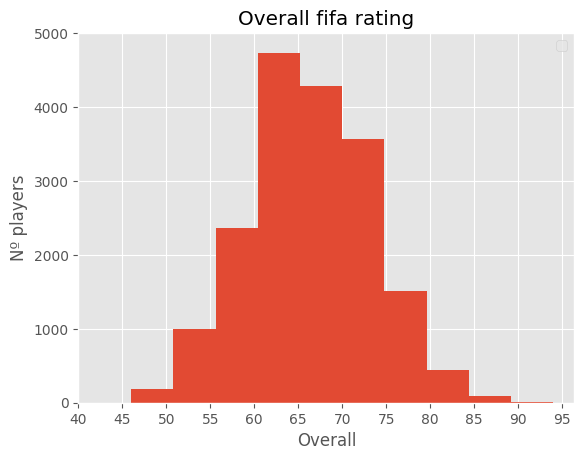

In [62]:
fifa = pd.read_csv("fifa_data.csv")

plt.hist(fifa["Overall"])

plt.title("Overall fifa rating") # Top title
plt.xlabel("Overall") # X label
plt.ylabel("Nº players") # Y label
plt.legend() # Shows it!

# ticks
plt.xticks(np.arange(40, 100, 5))
plt.yticks(np.arange(0, 5001, 1000))

plt.show()

#### Pie chart

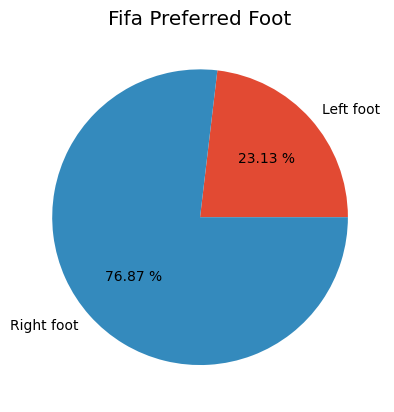

In [63]:
left_foot = (fifa["Preferred Foot"] == "Left").sum()
right_foot = (fifa["Preferred Foot"] != "Left").sum()

labels = ["Left foot", "Right foot"]
plt.pie([left_foot ,right_foot], labels=labels, autopct="%.2f %%")

plt.title("Fifa Preferred Foot")

plt.savefig("pie_graph.png", dpi=200)

plt.show()

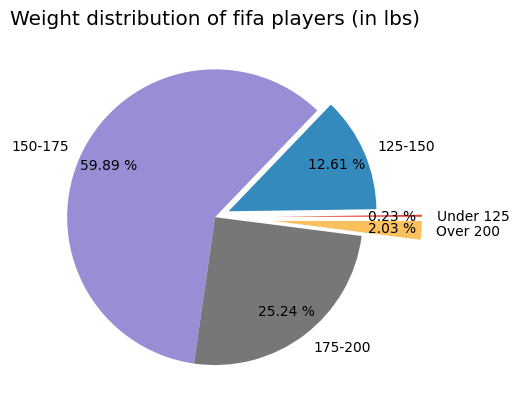

In [64]:
fifa["Weight"] = fifa["Weight"].str.replace("lbs", "")
fifa["Weight"] = pd.to_numeric(fifa["Weight"])

light_players = (fifa["Weight"] < 125).sum()
light_medium_players = ((fifa["Weight"] >= 125) & (fifa["Weight"] < 150)).sum()
medium_players = ((fifa["Weight"] >= 150) & (fifa["Weight"] < 175)).sum()
medium_heavy_players = ((fifa["Weight"] >= 175) & (fifa["Weight"] < 200)).sum()
heavy_players = (fifa["Weight"] >= 200).sum()

weights = [light_players, light_medium_players, medium_players, medium_heavy_players, heavy_players]
labels = ["Under 125", "125-150", "150-175", "175-200", "Over 200"]
explode = (.4,.1,0,0,.4)

plt.style.use("ggplot") # Color styles 

# autopct="%.2f %%" Porcentages
# pctdistance=0.8 Porcentages radius distance
# explode By defualt 0
plt.pie(weights, labels=labels, autopct="%.2f %%", pctdistance=0.8, explode=explode)
plt.title("Weight distribution of fifa players (in lbs)")

plt.show()

#### Box plot graph

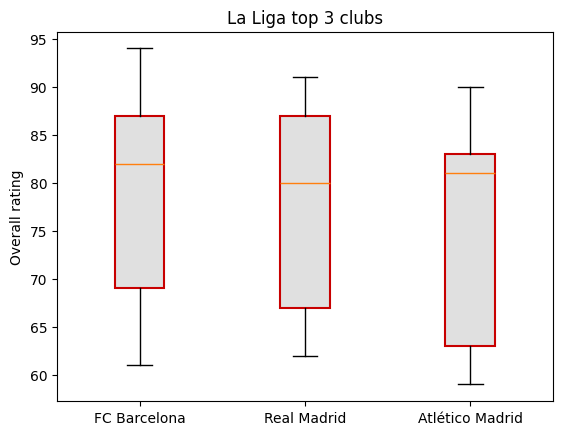

In [65]:
barcelona = fifa.loc[fifa["Club"] == "FC Barcelona", "Overall"]
real_madrid = fifa.loc[fifa["Club"] == "Real Madrid", "Overall"]
atc_madrid = fifa.loc[fifa["Club"] == "Atlético Madrid", "Overall"]

labels = ["FC Barcelona", "Real Madrid", "Atlético Madrid"]

plt.style.use("default") # Color styles 
boxes = plt.boxplot([barcelona, real_madrid, atc_madrid], labels=labels, patch_artist=True)

# colors
for box in boxes["boxes"]:
  box.set(color="#C80000", linewidth=1.5, facecolor="#e0e0e0")

# titles
plt.title("La Liga top 3 clubs") 
plt.ylabel("Overall rating") 

plt.show()

In [66]:
data_frame = pd.read_csv("Chicago_Crimes_2017.csv")

data_frame

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,Location Description,Arrest,Domestic,...,Ward,CommunityArea,FBICode,X Coordinate,Y Coordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10801165,JA100077,01/01/2017 01:00:00 AM,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,...,42.0,8.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
1,10801166,JA100115,01/01/2017 01:23:00 AM,084XX S SANGAMON ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,...,21.0,71.0,24,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
2,10801090,JA100010,01/01/2017 12:01:00 AM,064XX S STONY ISLAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,5.0,42.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
3,10801101,JA100031,01/01/2017 12:00:00 AM,074XX S SOUTH CHICAGO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,5.0,69.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
4,10801104,JA100015,01/01/2017 12:00:00 AM,004XX W 66TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,20.0,68.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11352,10827880,JA129033,01/18/2017 12:00:00 PM,013XX W 103RD ST,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,BANK,False,False,...,21.0,72.0,11,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
11353,23087,JA119807,01/18/2017 12:45:00 AM,000XX W 79TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,17.0,44.0,01A,1177172.0,1852624.0,2017,01/25/2017 03:54:12 PM,41.750934,-87.626325,"(41.750934055, -87.626325022)"
11354,23090,JA119838,01/18/2017 09:45:00 AM,051XX S BLACKSTONE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,4.0,41.0,01A,1186789.0,1871245.0,2017,01/25/2017 03:54:12 PM,41.801809,-87.590495,"(41.801809396, -87.590494612)"
11355,23091,JA120151,01/18/2017 10:12:00 AM,047XX W FLOURNOY ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,24.0,25.0,01A,1144693.0,1896604.0,2017,01/25/2017 03:54:12 PM,41.872293,-87.744241,"(41.872292662, -87.74424056)"


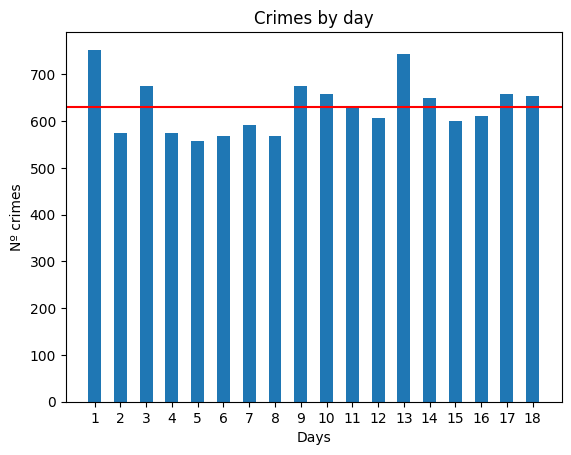

In [67]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])

crimes_by_day = data_frame["Date"].dt.day.value_counts()
labels = crimes_by_day.index.values
values = crimes_by_day

plt.bar(labels, values, width = 0.5, align='center')
plt.axhline(values.mean(), color = "red") # line

plt.title("Crimes by day") # Top title
plt.xlabel("Days") # X label
plt.ylabel("Nº crimes") # Y label

# ticks
plt.xticks(labels)

plt.show()

C:\Users\Rafael Gómez\AppData\Local\Temp\ipykernel_6576\1682674025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  battery_df["Date"] = pd.to_datetime(battery_df["Date"])


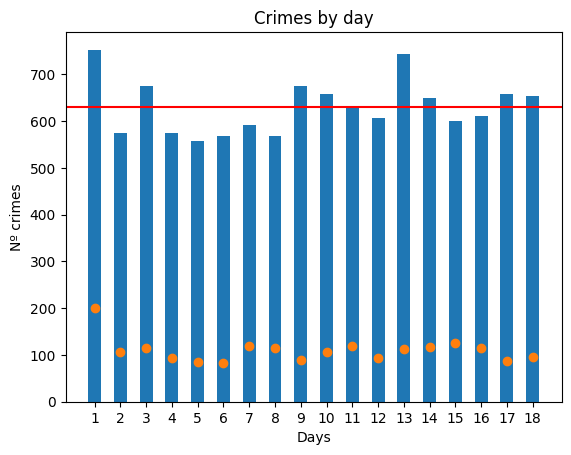

In [68]:
battery_df = data_frame.loc[data_frame["PrimaryType"] == "BATTERY"]
battery_df["Date"] = pd.to_datetime(battery_df["Date"])

battery_days = battery_df["Date"].dt.day.value_counts()
crimes_by_day = data_frame["Date"].dt.day.value_counts()

labels = crimes_by_day.index.values
values = crimes_by_day

plt.bar(labels, values, width = 0.5, align='center')
plt.scatter(battery_days.index.values, battery_days)
plt.axhline(values.mean(), color = "red") # line

plt.title("Crimes by day") # Top title
plt.xlabel("Days") # X label
plt.ylabel("Nº crimes") # Y label

# ticks
plt.xticks(labels)

plt.show()

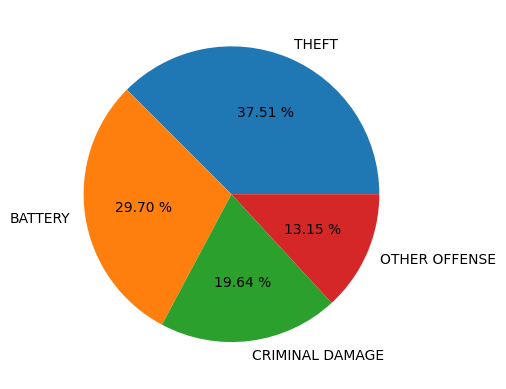

In [69]:
crime_types = data_frame.query('PrimaryType in ("THEFT", "BATTERY", "CRIMINAL DAMAGE", "OTHER OFFENSE")')
crime_types_procentage = crime_types["PrimaryType"].value_counts(normalize = True)

plt.pie(crime_types_procentage, labels = crime_types_procentage.index, autopct="%.2f %%")

plt.show()

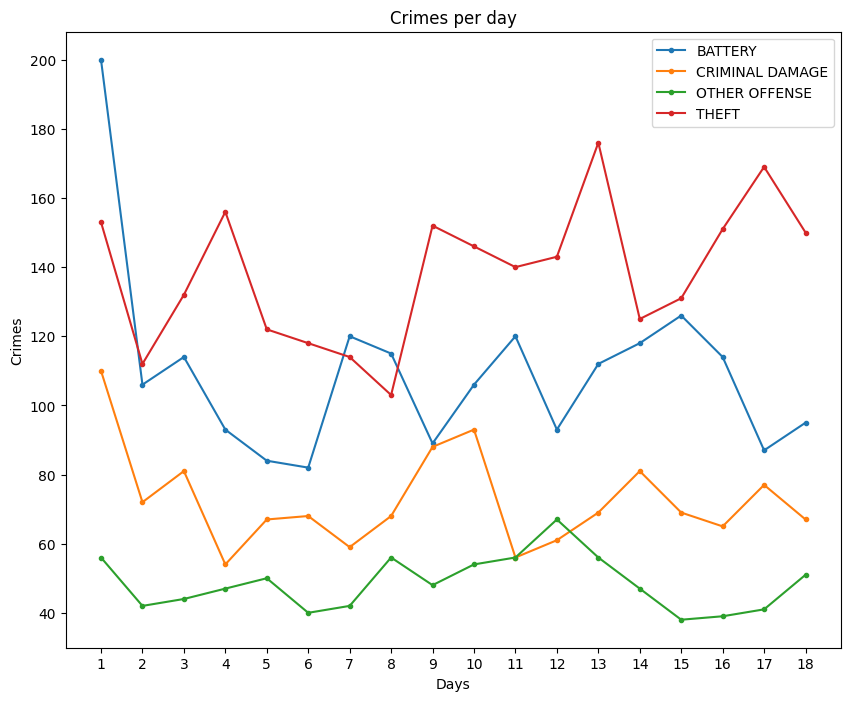

In [86]:
data_frame["Day"] = data_frame["Date"].dt.day

crime_types_t = data_frame.query('PrimaryType in ("THEFT", "BATTERY", "CRIMINAL DAMAGE", "OTHER OFFENSE")').groupby(["PrimaryType", "Day"]).size().unstack().T

plt.figure(figsize = (10, 8))

plt.plot(crime_types_t, label = crime_types_t.columns.values, marker = ".")

plt.xticks(crime_types_t.index.values)
plt.title("Crimes per day") 
plt.xlabel("Days") 
plt.ylabel("Crimes") 
plt.legend(loc='upper right')

plt.show()